In [1]:
from sympy import symbols
from sympy import solve, Eq, sqrt
from sympy import init_printing
from sympy import latex
import pandas as pd

init_printing(latex_printer=lambda *args, **kwargs: latex(*args, mul_symbol='dot', **kwargs))

de formules hieronder is voor de situatie in domein 2a en waarbij men in het constante gedeelte van de staalspanningsdiagram is.

In [2]:
mu_d, M_d, b, d, f_cd = symbols('mu_d M_d b d f_cd', Positive = True, Real = True)
f_ck = symbols('f_ck', Positive = True, Real = True)
omega, A_s, f_yd, f_yk = symbols('omega A_s f_yd f_yk', Positive = True, Real = True)
xi, psi, sigma_s, delta_G = symbols('xi psi sigma_s delta_G', Positive = True, Real = True)

In [3]:
Eq1 = Eq(mu_d, M_d/(b*d**2*f_cd))
Eq2 = Eq(f_cd, 0.85*f_ck/1.5)
Eq8 = Eq(f_yd, f_yk/1.15)
Eq3 = Eq1.subs(f_cd, solve(Eq2, f_cd)[0])
Eq4 = Eq(xi, ((1-sqrt(1-((4*delta_G*mu_d)/psi)))/(2*delta_G)))
Eq5 = Eq(omega, (A_s*f_yd)/(b*d*f_cd))
Eq6 = Eq(omega, psi*xi)
Eq7 = Eq(omega, (psi*f_yd*xi)/sigma_s)
Eq9 = Eq7.subs(f_yd, solve(Eq8, f_yd)[0])

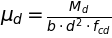

In [4]:
Eq1

In [5]:
Eq2

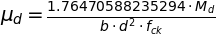

In [6]:
Eq3

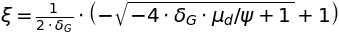

In [7]:
Eq4

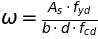

In [8]:
Eq5

In [9]:
Eq6

Berekening voor wapeningsoppervlakte.
gekenden:
b,
d(in eerste berekening 0.9 x h),
fyd
fcd

In [10]:
Eq10 = Eq6.subs(xi, solve(Eq4,xi)[0])
Eq11 = Eq5.subs(omega, solve(Eq10,omega)[0])
Eq12 = Eq11.subs(mu_d, solve(Eq1,mu_d)[0])
Eq13 = Eq12.subs(f_cd, solve(Eq2,f_cd)[0])
Eq14 = solve(Eq13, A_s)[0]
Eq15 = Eq14.subs(f_yd, solve(Eq8,f_yd)[0])
#Eq15

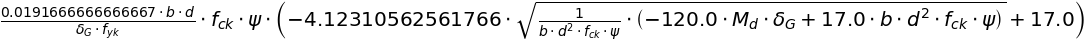

In [11]:
Eq15

In [12]:
beamData=({b:140, d:300, psi:0.810, delta_G:0.416, f_ck:25, f_yk:220, M_d:39062500})
print(Eq15.subs(beamData))

-379.729018125371*sqrt(35) + 3027.98568618881


In [13]:
(50*2500*2500)/8

In [14]:
39062500/(140*200*200*25)

In [15]:
float(-379.729018125371*sqrt(35) + 3027.98568618881)

In [27]:
def check_for_amount_rebar():
    df = pd.read_csv('../MateriaalTabellen/wapening.csv', sep=',')
    for index, row in df.iterrows():
        if row['10']<943:
            i=index
    if i == 11:
        print('0')
    else:
        print(i+2)

0
